In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [12]:
def plot_vsf(void_fn, ax=None):
    
    if ax is None: fig, ax = plt.subplots(1)
    r, vsf, err = np.load(void_fn)
    ax.errorbar(r, vsf, err, marker='o', markersize=4)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(axis='y')
    ax.grid(axis='x', which='both')
    ax.set_ylabel('$dn/dlnR$ ($h^{-1}Mpc)^{-3}$', fontsize=12)
    ax.set_xlabel('$R$ ($h^{-1}Mpc$)', fontsize=12)
    ax.set_xlim(r[-1]-1, r[vsf>0].max()+5)

    ax.xaxis.set_minor_formatter(ScalarFormatter())

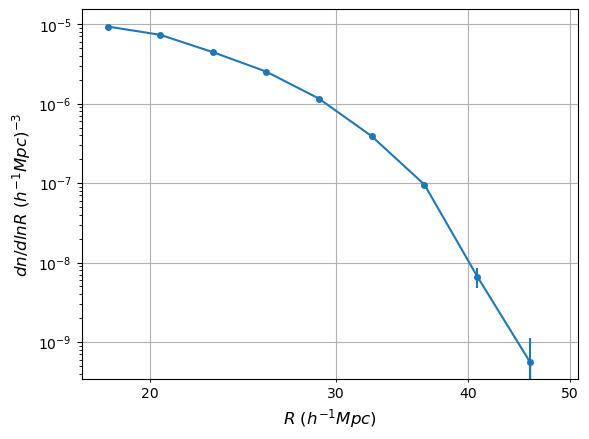

In [13]:
plot_vsf("output/void_vsf.npy")